In [35]:
import sys
sys.path.append("../")
from src import data
import pandas as pd
import numpy as np
import scipy.stats

Let's get the two dataframes

In [2]:
pop_songs, non_pop_songs = data.get_split_dfs(drop_columns=['id','name','popularity','key'])

We try to calculate the F value now for 10000 bootstrapped sampled each to estimate our certainty about the variance calculation.

In [27]:

F_values = pd.DataFrame()
for i in range(10000):
    pop_resampled = pop_songs.sample(frac=1, replace=True)
    assert pop_resampled.shape == (pop_songs.shape)
    non_pop_resampled = non_pop_songs.sample(frac=1, replace=True)
    assert non_pop_resampled.shape == (non_pop_resampled.shape)
    F = non_pop_resampled.var() / pop_resampled.var()
    F_values = F_values.append(F, ignore_index=True)

Let's analyse the variance estimations for all samples

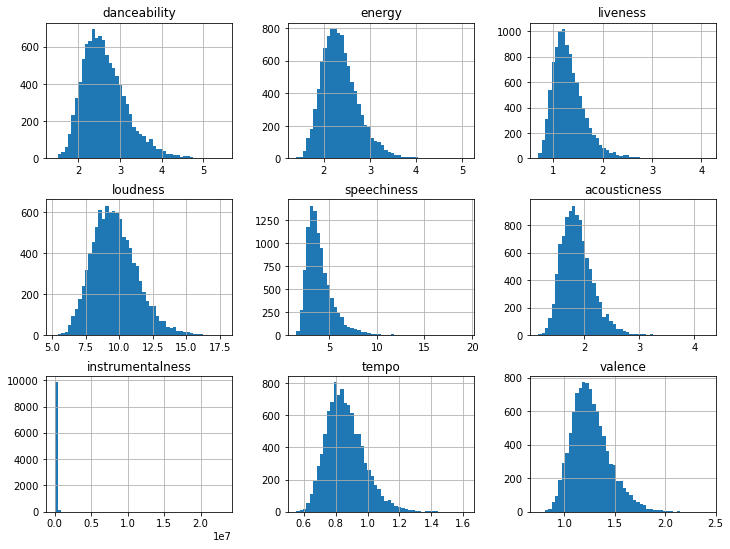

In [31]:
F_values.hist(figsize=(12,9), bins=50)
print('')

Let's calculate how many of those values are above the critical value each:

In [37]:
f_crit = scipy.stats.f.ppf(q=(1-0.05/9), dfn=(len(non_pop_songs)-1), dfd=(len(pop_songs))-1)
np.mean(F_values > f_crit) * 100

danceability         99.61
energy               99.42
liveness             16.11
loudness            100.00
speechiness          99.99
acousticness         82.07
instrumentalness    100.00
tempo                 0.01
valence               5.34
dtype: float64

Let's see what appens if we resample equal sample sizes

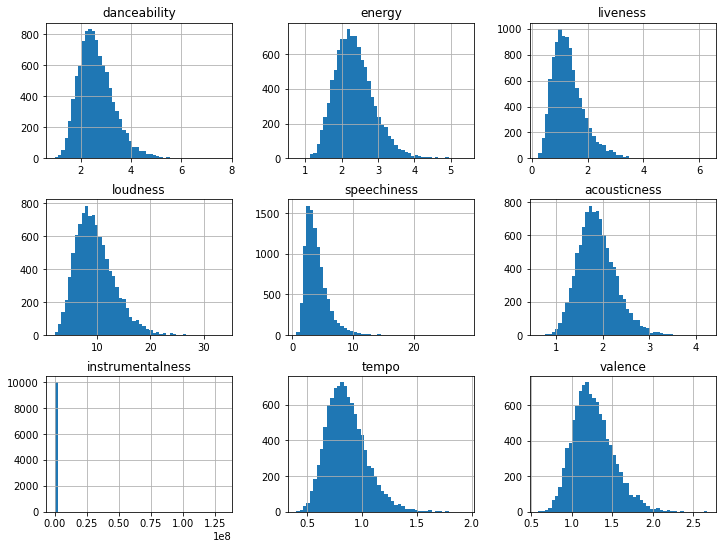

In [30]:
F_values_eq = pd.DataFrame()
for i in range(10000):
    pop_resampled = pop_songs.sample(frac=1, replace=True)
    assert pop_resampled.shape == (pop_songs.shape)
    non_pop_resampled = non_pop_songs.sample(n=pop_songs.shape[0], replace=True)
    assert non_pop_resampled.shape == (pop_songs.shape) # now check that sample sizes match
    F = non_pop_resampled.var() / pop_resampled.var()
    F_values_eq = F_values_eq.append(F, ignore_index=True)
F_values_eq.hist(figsize=(12,9), bins=50)
print('')